# Handwritten Digit Recognition Using SVM Algorithm
- **To develop a model using Support Vector Machine (SVM) which can correctly classify the handwritten digits from 0-9 based on the pixel values given as features.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn.model_selection import GridSearchCV

### Import Dataset

In [ ]:
df= pd.read_csv('digit_svm.csv')

In [ ]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Visualization

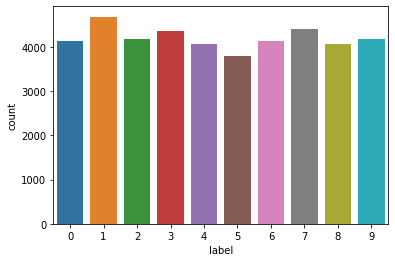

In [ ]:
sns.countplot(x = 'label' , data = df)
plt.show()

The dataset here is a balanced dataset so let's fix accuracy as a mtric.

### Data Preprocessing

- Now This will check for null values and replacing it.

In [ ]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
df.fillna(value=0)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.fillna(999, inplace=True)

### Split The Dataset For Training And Testing

In [ ]:
x= df.iloc[:, 1:].values
y= df.iloc[:, 0].values

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [ ]:
print(x.shape)

(42000, 784)


In [ ]:
train_x, test_x, train_y, test_y= train_test_split(x, y, test_size= 0.2, random_state= 104)

In [ ]:
train_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train_y

array([4, 0, 4, ..., 6, 2, 4])

In [ ]:
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
test_y

array([7, 1, 4, ..., 9, 0, 4])

### Visualize The Digit By Reshaping

In [ ]:
img= df.iloc[3, 1:].values
img= img.reshape(28,28)

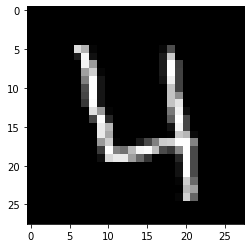

In [ ]:
plt.imshow(img, cmap= 'gray')
plt.show()

### Normalization
- Normalizing the values of pixels using StandardScaler

In [ ]:
st= StandardScaler()

In [ ]:
train_x= st.fit_transform(train_x)
test_x= st.fit_transform(test_x)

In [ ]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Build a Linear Kernel SVC model

In [ ]:
svc_clf= SVC(kernel= 'linear')

In [ ]:
svc_clf.fit(train_x, train_y)

SVC(kernel='linear')

In [ ]:
pred_y= svc_clf.predict(test_x)

In [ ]:
pred_y

array([7, 1, 4, ..., 9, 0, 4])

### Accuraccy For Linear Model

In [ ]:
accuracy_score(test_y, pred_y)

0.9189285714285714

### Classification Report

In [ ]:
acc_report= classification_report(test_y, pred_y)
print(acc_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       897
           1       0.95      0.98      0.97       930
           2       0.89      0.92      0.90       827
           3       0.87      0.89      0.88       836
           4       0.90      0.93      0.91       800
           5       0.89      0.86      0.87       758
           6       0.96      0.95      0.95       861
           7       0.94      0.93      0.94       845
           8       0.92      0.88      0.90       792
           9       0.91      0.87      0.89       854

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



### Build a RBF Kernel Model

In [ ]:
svc_rbf= SVC()

In [ ]:
svc_rbf.fit(train_x, train_y)

SVC()

In [ ]:
predrbf_y= svc_rbf.predict(test_x)

In [ ]:
predrbf_y

array([7, 1, 4, ..., 9, 0, 4])

In [ ]:
accuracy_score(test_y, predrbf_y)

0.9586904761904762

In [ ]:
acc_report= classification_report(test_y, predrbf_y)
print(acc_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       897
           1       0.98      0.98      0.98       930
           2       0.94      0.95      0.95       827
           3       0.95      0.95      0.95       836
           4       0.95      0.96      0.95       800
           5       0.96      0.93      0.95       758
           6       0.97      0.98      0.97       861
           7       0.93      0.97      0.95       845
           8       0.96      0.94      0.95       792
           9       0.96      0.94      0.95       854

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



### Best Estimator Given by GridSearchCV

In [ ]:
parameters = {'C':[1,10 , 100] , 
              'gamma' :[1e-2 , 1e-3 , 1e-4 ],
              'kernel' :['linear' ,'rbf']
              }

In [ ]:
svc_grid_search = SVC()

In [ ]:
# create a classifier to perform grid search
clf = GridSearchCV(svc_grid_search, param_grid=parameters, scoring='accuracy')

In [ ]:
# fit
clf.fit(train_x, train_y)

In [ ]:
clf.best_estimator_

In [ ]:
model = SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True,
    tol=0.001, verbose=False)

model.fit(train_x , train_y)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = model.predict(test_x)

In [ ]:
accuracy_score(test_y,y_pred)

0.9672619047619048

### Confusion Matrix

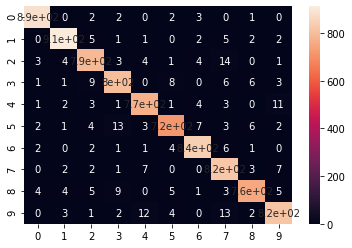

In [ ]:
cm=confusion_matrix(test_y,y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True)

## Finally achieved 96.7% of accuracy score by using best estimators given by gridsearchcv